# Color analysis

#### Reference colors

CSS https://www.w3.org/wiki/CSS/Properties/color/keywords

CSS4 https://matplotlib.org/3.1.1/gallery/color/named_colors.html

## Load data

In [38]:
import json
import pandas as pd

In [2]:
cdf = pd.read_csv('frame_centroids.csv')

In [3]:
cdf.head()

,movie_id,movie_title,year,frame_id,centroid_id,red,green,blue
0,0,make_mine_music,1940,0,0,0.494841,0.333643,0.382833
1,0,make_mine_music,1940,0,1,0.538713,0.574225,0.639382
2,0,make_mine_music,1940,0,2,0.363670,0.420475,0.553765
3,0,make_mine_music,1940,0,3,0.244141,0.312930,0.425660
4,0,make_mine_music,1940,0,4,0.727626,0.745525,0.815441


In [4]:
cdf.shape

(150130, 8)

In [5]:
print('Total centroids:', cdf.shape[0])

Total centroids: 150130


In [6]:
print('Total frames:', cdf.shape[0]/10)

Total frames: 15013.0


In [7]:
print('Total movies:', len(cdf['movie_id'].unique()))

Total movies: 129


In [8]:
cdf['rgb'] = [(i[-3], i[-2], i[-1]) for i in cdf.values]
cdf.drop(columns=['red', 'green', 'blue'], axis=1, inplace=True)
cdf.head()

,movie_id,movie_title,year,frame_id,centroid_id,rgb
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382..."
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639..."
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55..."
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42..."
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815..."


## Data exploration

In [9]:
header = ['decade', 'movies', 'frames', 'centroids']
metadata_matrix = []

decades = cdf['year'].unique()

for d in decades:
    tmp_df = cdf[cdf['year'] == d]
    nm = len(tmp_df['movie_id'].unique())
    nc = tmp_df.shape[0]
    nf = nc / 10
    metadata_matrix.append([d, nm, nf, nc])
    
metadata_df = pd.DataFrame(data=metadata_matrix, columns=header)
metadata_df.sort_values(by=['decade'])

,decade,movies,frames,centroids
6,1930,41,821.0,8210
0,1940,7,894.0,8940
8,1950,5,679.0,6790
7,1960,3,428.0,4280
4,1970,4,567.0,5670
5,1980,5,726.0,7260
3,1990,15,2364.0,23640
1,2000,24,3952.0,39520
2,2010,25,4582.0,45820


## Assign reference colors to centroids

In [10]:
import numpy as np
from skimage import color
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [11]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [12]:
CSS_COLORS = [
    'black',
    'silver',
    'gray',
    'white',
    'maroon',
    'red',
    'purple',
    'fuchsia',
    'green',
    'lime',
    'olive',
    'yellow',
    'navy',
    'blue',
    'teal',
    'aqua'
]

CSS4_SELECTION_COLORS = [
    'black',
    'silver',
    'gray',
    'white',
    'lightcoral',
    'red',
    'maroon',
    'chocolate',
    'tan',
    'orange',
    'goldenrod',
    'darkkhaki',
    'yellow',
    'darkseagreen',
    'green',
    'lime',
    'darkslategray',
    'darkcyan',
    'cyan',
    'deepskyblue',
    'steelblue',
    'navy',
    'blue',
    'darkviolet',
    'violet',
    'purple',
    'magenta',
    'deeppink',
    'pink'   
]

print('DISTINCT CSS:\t\t', len(CSS_COLORS), '\nDISTINCT CSS4_SELECTION:', len(CSS4_SELECTION_COLORS))

DISTINCT CSS:		 16 
DISTINCT CSS4_SELECTION: 29


In [13]:
CSS4_HEX_COLORS = list(mcolors.CSS4_COLORS.values())
CSS4_RGB_COLORS = [mcolors.hex2color(c) for c in mcolors.CSS4_COLORS]
CSS4_LAB_COLORS = [convert_rgb2lab(c) for c in CSS4_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]
BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

CSS_HEX_COLORS  = [mcolors.CSS4_COLORS[c] for c in CSS_COLORS]
CSS_RGB_COLORS  = [mcolors.hex2color(c) for c in CSS_HEX_COLORS]
CSS_LAB_COLORS  = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

CSS4_SEL_HEX_COLORS  = [mcolors.CSS4_COLORS[c] for c in CSS4_SELECTION_COLORS]
CSS4_SEL_RGB_COLORS  = [mcolors.hex2color(c) for c in CSS4_SEL_HEX_COLORS]
CSS4_SEL_LAB_COLORS  = [convert_rgb2lab(c) for c in CSS4_SEL_RGB_COLORS]

In [14]:
colors = {
    'CSS': {
        'HEX': CSS_HEX_COLORS,
        'RGB': CSS_RGB_COLORS,
        'LAB': CSS_LAB_COLORS
    },
    'CSS4': {
        'HEX': CSS4_HEX_COLORS,
        'RGB': CSS4_RGB_COLORS,
        'LAB': CSS4_LAB_COLORS
    },
    'CSS4_SEL': {
        'HEX': CSS4_SEL_HEX_COLORS,
        'RGB': CSS4_SEL_RGB_COLORS,
        'LAB': CSS4_SEL_LAB_COLORS
    }
}

In [15]:
CSS4_INV_MAP = {}
for k, v in mcolors.CSS4_COLORS.items():
    CSS4_INV_MAP[v] = k

In [16]:
def get_ref_color(rgb_color, ref_colors):
    ref_lab_colors = colors[ref_colors]['LAB']
    ref_rgb_colors = colors[ref_colors]['RGB']
    ref_hex_colors = colors[ref_colors]['HEX']
    
    lab_color = convert_rgb2lab(rgb_color)
    
    min_distance = deltaE_cie76(lab_color, ref_lab_colors[0])
    nearest_ref_color = 0

    k = 1
    for c in ref_lab_colors[1:]: # CSS4_LAB_COLORS[0] already processed above
        tmp_distance = deltaE_cie76(lab_color, c)
        if (tmp_distance < min_distance):
            min_distance = tmp_distance
            nearest_ref_color = k
        k += 1

    return ref_rgb_colors[nearest_ref_color], ref_hex_colors[nearest_ref_color]

In [17]:
def add_ref_column(df, palette_id):
    df['ref_color_rgb_hex'] = df['rgb'].apply(lambda x: get_ref_color(x, palette_id))
    df[palette_id + '_ref_color_rgb'] = [i[0] for i in df['ref_color_rgb_hex']]
    df[palette_id + '_ref_color_hex'] = [i[1] for i in df['ref_color_rgb_hex']]
    df.drop(columns=['ref_color_rgb_hex'], axis=1, inplace=True)

In [18]:
%%time
#add_ref_column(cdf, 'CSS')
add_ref_column(cdf, 'CSS4')
cdf.head()

CPU times: user 2min 52s, sys: 285 ms, total: 2min 52s
Wall time: 2min 51s


,movie_id,movie_title,year,frame_id,centroid_id,rgb,CSS4_ref_color_rgb,CSS4_ref_color_hex
0,0,make_mine_music,1940,0,0,"(0.4948409661638601, 0.3336431652742103, 0.382...","(0.4117647058823529, 0.4117647058823529, 0.411...",#696969
1,0,make_mine_music,1940,0,1,"(0.5387126649529148, 0.5742250325642928, 0.639...","(0.4666666666666667, 0.5333333333333333, 0.6)",#778899
2,0,make_mine_music,1940,0,2,"(0.36366959978116187, 0.4204748239497644, 0.55...","(0.4392156862745098, 0.5019607843137255, 0.564...",#708090
3,0,make_mine_music,1940,0,3,"(0.2441414631891009, 0.31293046306577865, 0.42...","(0.1843137254901961, 0.30980392156862746, 0.30...",#2F4F4F
4,0,make_mine_music,1940,0,4,"(0.7276261576840661, 0.7455248882923641, 0.815...","(0.6901960784313725, 0.7686274509803922, 0.870...",#B0C4DE


In [19]:
def plot_ref_colors(df, ref_colors_column='ref_color', title='', normalize=True):        
    value_counts = df[ref_colors_column].value_counts(normalize=normalize)
    plt.figure(figsize = (20, 6))
    value_counts.plot(kind = 'bar', color = list(value_counts.index))
    
    if title != '':
        plt.title(title)
    plt.show()
    return

### CSS4

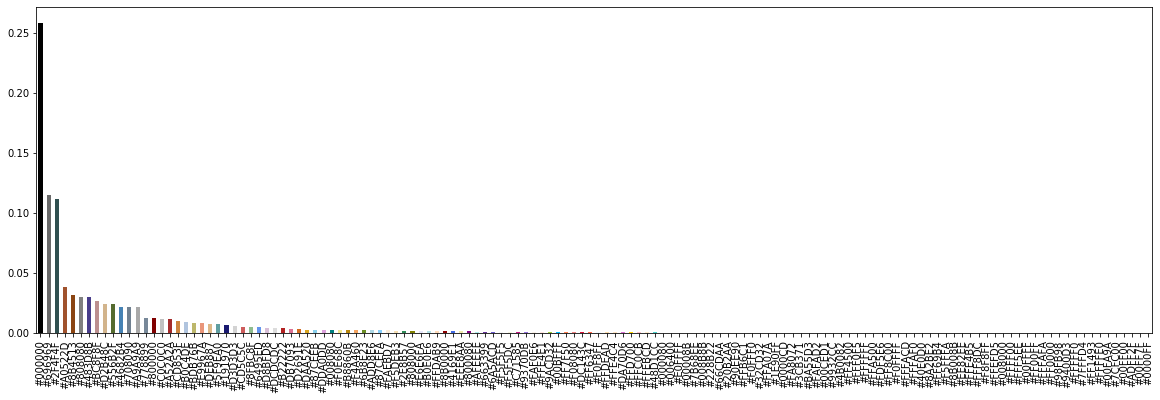

In [20]:
plot_ref_colors(cdf, 'CSS4_ref_color_hex')

In [21]:
cdf[cdf['CSS4_ref_color_hex'] != '#000000'] \
    .rename(columns={"CSS4_ref_color_hex": "ref_color"}) \
    .drop(columns=['CSS4_ref_color_rgb', 'rgb']) \
    .groupby(by=['year', 'ref_color']).size().reset_index(name='counts')

,year,ref_color,counts
0,1930,#000080,4
1,1930,#00008B,6
2,1930,#0000CD,3
3,1930,#006400,4
4,1930,#008080,25
5,1930,#008B8B,1
6,1930,#00BFFF,1
7,1930,#191970,34
8,1930,#1E90FF,4
9,1930,#20B2AA,2


In [22]:
cdf[cdf['CSS4_ref_color_hex'] != '#000000'] \
    .rename(columns={"CSS4_ref_color_hex": "ref_color"}) \
    .drop(columns=['CSS4_ref_color_rgb', 'rgb']) \
    .groupby(by=['year', 'ref_color']).size().reset_index(name='counts') \
    .to_csv('decade_ref_colors_counts.csv', index=False)

In [23]:
import colorsys

def get_hsv(hexrgb):
    hexrgb = hexrgb.lstrip("#")   # in case you have Web color specs
    r, g, b = (int(hexrgb[i:i+2], 16) / 255.0 for i in range(0,5,2))
    return colorsys.rgb_to_hsv(r, g, b)

In [24]:
color_list = ["000050", "005000", "500000"]  # GBR
color_list.sort(key=get_hsv)
print(color_list)

['500000', '005000', '000050']


In [25]:
color_list = [c for c in cdf['CSS4_ref_color_hex'].unique() if c != '#000000']
print(color_list)

['#696969', '#778899', '#708090', '#2F4F4F', '#B0C4DE', '#483D8B', '#808000', '#DAA520', '#A52A2A', '#4682B4', '#191970', '#C71585', '#DB7093', '#DA70D6', '#663399', '#808080', '#A9A9A9', '#556B2F', '#C0C0C0', '#FFF0F5', '#87CEFA', '#ADD8E6', '#6495ED', '#DCDCDC', '#E6E6FA', '#D8BFD8', '#B22222', '#9370DB', '#A0522D', '#E9967A', '#5F9EA0', '#6A5ACD', '#00008B', '#8FBC8F', '#87CEEB', '#E0FFFF', '#4169E1', '#7B68EE', '#BC8F8F', '#8B4513', '#800000', '#F0F8FF', '#B8860B', '#008B8B', '#008080', '#3CB371', '#66CDAA', '#D2B48C', '#F5DEB3', '#000080', '#40E0D0', '#FF6347', '#CD853F', '#D2691E', '#F0E68C', '#FAEBD7', '#DEB887', '#FF69B4', '#F4A460', '#8B0000', '#9932CC', '#B0E0E6', '#DDA0DD', '#BDB76B', '#800080', '#F5F5DC', '#CD5C5C', '#48D1CC', '#D3D3D3', '#FFB6C1', '#EE82EE', '#F08080', '#FFD700', '#F5F5F5', '#FFE4E1', '#DC143C', '#FFA500', '#FFFF00', '#FAFAD2', '#FF4500', '#FFA07A', '#FFEBCD', '#FFC0CB', '#00CED1', '#AFEEEE', '#6B8E23', '#FFDAB9', '#FFE4C4', '#2E8B57', '#FFDEAD', '#FF7F50'

In [28]:
color_list.sort(key=get_hsv)
print(color_list)

['#696969', '#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#DCDCDC', '#F5F5F5', '#FFFFFF', '#FFFAFA', '#BC8F8F', '#F08080', '#CD5C5C', '#A52A2A', '#B22222', '#800000', '#8B0000', '#FF0000', '#FFE4E1', '#FA8072', '#FF6347', '#E9967A', '#FF7F50', '#FF4500', '#FFA07A', '#A0522D', '#FFF5EE', '#D2691E', '#8B4513', '#F4A460', '#FFDAB9', '#CD853F', '#FAF0E6', '#FFE4C4', '#FF8C00', '#DEB887', '#FAEBD7', '#D2B48C', '#FFDEAD', '#FFEBCD', '#FFEFD5', '#FFE4B5', '#FFA500', '#F5DEB3', '#FDF5E6', '#FFFAF0', '#B8860B', '#DAA520', '#FFF8DC', '#FFD700', '#FFFACD', '#F0E68C', '#EEE8AA', '#BDB76B', '#FFFFF0', '#F5F5DC', '#FFFFE0', '#FAFAD2', '#808000', '#FFFF00', '#6B8E23', '#9ACD32', '#556B2F', '#ADFF2F', '#7CFC00', '#F0FFF0', '#8FBC8F', '#98FB98', '#90EE90', '#228B22', '#32CD32', '#006400', '#008000', '#00FF00', '#2E8B57', '#3CB371', '#00FF7F', '#F5FFFA', '#00FA9A', '#66CDAA', '#7FFFD4', '#40E0D0', '#20B2AA', '#48D1CC', '#F0FFFF', '#E0FFFF', '#AFEEEE', '#2F4F4F', '#008080', '#008B8B', '#00FFFF', '#00CED1'

In [29]:
color_names_list = [CSS4_INV_MAP[c] for c in color_list]
print(color_names_list)

['dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey', 'gainsboro', 'whitesmoke', 'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'a

In [59]:
color_pairs_dict = {
    '#696969': '#A9A9A9',
    '#BC8F8F': '#FF0000',
    '#FFF5EE': '#CD853F',
    '#BDB76B': '#008000',
    '#008080': '#4682B4',
    '#191970': '#9400D3',
    '#DB7093': '#DB7093'
}

In [60]:
color_pairs_dict['#696969']

'#A9A9A9'

In [61]:
ref_full_colors = []
current_ref = ''
for i, c in enumerate(color_list):
    current_ref = color_pairs_dict.get(c, current_ref)
    ref_full_colors.append(
        {
            'h': c,
            'n': color_names_list[i],
            'h_group': current_ref,
            'n_group': color_names_list[color_list.index(current_ref)]
        }
    )

In [62]:
ref_full_colors

[{'h': '#696969', 'n': 'dimgrey', 'h_group': '#A9A9A9', 'n_group': 'darkgrey'},
 {'h': '#808080', 'n': 'grey', 'h_group': '#A9A9A9', 'n_group': 'darkgrey'},
 {'h': '#A9A9A9',
  'n': 'darkgrey',
  'h_group': '#A9A9A9',
  'n_group': 'darkgrey'},
 {'h': '#C0C0C0', 'n': 'silver', 'h_group': '#A9A9A9', 'n_group': 'darkgrey'},
 {'h': '#D3D3D3',
  'n': 'lightgrey',
  'h_group': '#A9A9A9',
  'n_group': 'darkgrey'},
 {'h': '#DCDCDC',
  'n': 'gainsboro',
  'h_group': '#A9A9A9',
  'n_group': 'darkgrey'},
 {'h': '#F5F5F5',
  'n': 'whitesmoke',
  'h_group': '#A9A9A9',
  'n_group': 'darkgrey'},
 {'h': '#FFFFFF', 'n': 'white', 'h_group': '#A9A9A9', 'n_group': 'darkgrey'},
 {'h': '#FFFAFA', 'n': 'snow', 'h_group': '#A9A9A9', 'n_group': 'darkgrey'},
 {'h': '#BC8F8F', 'n': 'rosybrown', 'h_group': '#FF0000', 'n_group': 'red'},
 {'h': '#F08080', 'n': 'lightcoral', 'h_group': '#FF0000', 'n_group': 'red'},
 {'h': '#CD5C5C', 'n': 'indianred', 'h_group': '#FF0000', 'n_group': 'red'},
 {'h': '#A52A2A', 'n': 'b

In [63]:
with open('data.json', 'w') as outfile:
    json.dump(ref_full_colors, outfile)

In [52]:
color_list[color_names_list.index('blue')]

'#0000FF'

In [53]:
color_list[color_names_list.index('darkviolet')]

'#9400D3'